# Environment setup

In [2]:
# pipeline.ipynb  — master orchestrator
# -------------------------------------------------------------
# Ensure the project root is on the Python path so we can import
# our local modules (feature_engineering.py, pca_baseline.py, clustering.py)
import sys, pathlib, os
from IPython.display import Image, display

# In Jupyter, just use the directory where the notebook lives
PROJECT_ROOT = pathlib.Path(os.getcwd()).resolve()
sys.path.append(str(PROJECT_ROOT))

DATA_DIR = PROJECT_ROOT / "data"
DATA_DIR.mkdir(exist_ok=True)

print("Project root:", PROJECT_ROOT)
print("Data dir:", DATA_DIR)


Project root: /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project
Data dir: /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/data


# Run feature engineering

In [3]:
import feature_engineering  # must expose main()

parquet_path = DATA_DIR / "sp500_features.parquet"

if not parquet_path.exists():
    print("[INFO]   sp500_features.parquet not found — running feature engineering …")
    feature_engineering.main()
else:
    print("[SKIP]   Feature engineering already done.")

[SKIP]   Feature engineering already done.


# Run PCA + log‑reg baseline

In [4]:
import pca_baseline  # must expose main()

print("\n[STAGE]  PCA + baseline")
pca_baseline.main()   # prints metrics and writes data/pca_features.parquet (parquet for simplicity)


[STAGE]  PCA + baseline
Label distribution:
label
1    0.671314
2    0.171465
0    0.157221
Name: proportion, dtype: float64
display(Image("/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/pca_variance.png"))
display(Image("/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/logreg_roc.png"))
====== Logistic Regression Baseline Metrics: ======
  accuracy: 0.5842
 precision: 0.4981
    recall: 0.5602
        f1: 0.5073
              precision    recall  f1-score   support

        down       0.34      0.58      0.43     16495
     neutral       0.83      0.61      0.70     78482
          up       0.32      0.49      0.39     18204

    accuracy                           0.58    113181
   macro avg       0.50      0.56      0.51    113181
weighted avg       0.68      0.58      0.61    113181



# Run clustering


[STAGE]  Clustering


/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/clustering.py:59: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/clustering.py:60: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(elbow_path, dpi=120)
/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/clustering.py:121: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/clustering.py:122: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(scatter_path, dpi=120)


=== Clustering Summary ===
      k_chosen: 3
    silhouette: 0.21986791495687355
davies_bouldin: 1.4683950115272129
[RESULT] Clustering metrics: {'k_chosen': 3, 'silhouette': 0.21986791495687355, 'davies_bouldin': 1.4683950115272129}
[PLOT]   elbow_plot → /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/kmeans_elbow.png
[PLOT]   scatter_plot → /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/pca_clusters.png


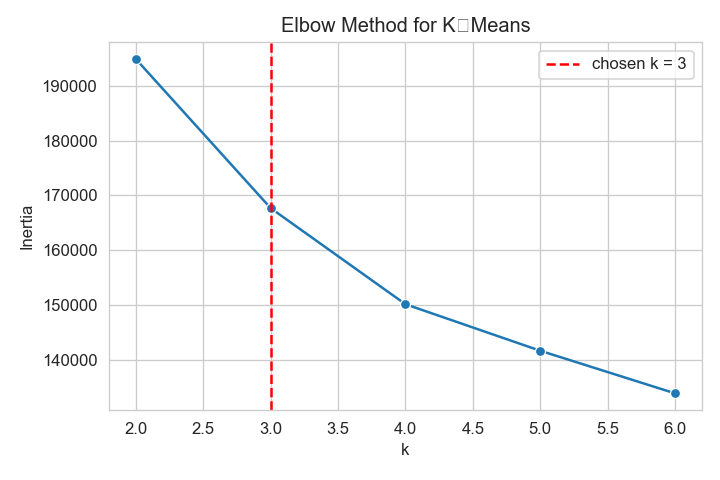

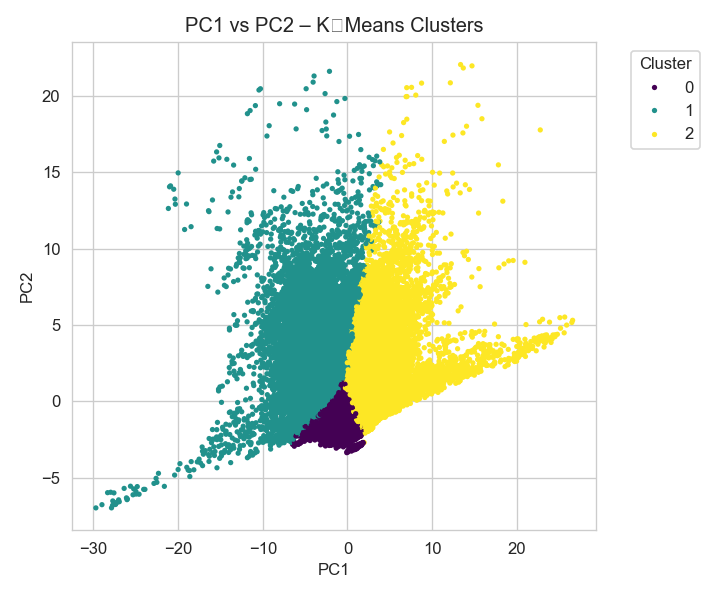

In [5]:
from clustering import run as clustering_run

print("\n[STAGE]  Clustering")
cluster_metrics, plots = clustering_run()

print("[RESULT] Clustering metrics:", cluster_metrics)
for label, path in plots.items():
    print(f"[PLOT]   {label} → {path}")

display(Image(filename=plots["elbow_plot"]))
display(Image(filename=plots["scatter_plot"]))

# Quick sanity check

In [7]:
import pandas as pd

final_path = DATA_DIR / "cluster.parquet"
df_final = pd.read_parquet(final_path)
print(f"Final dataset shape: {df_final.shape}")
print(df_final.head())

Final dataset shape: (565905, 9)
          0         1         2         3         4         5         6  \
0  1.230536 -1.185638 -0.124378  0.889193  0.049838  0.111289 -0.382039   
1  0.343209 -1.467212 -0.227604 -0.296904 -0.237721 -0.192881 -0.375403   
2  1.657267 -1.032648 -0.567101 -0.305760 -1.140468 -0.537465  0.053001   
3  2.995395  0.440721 -1.201583  1.897525 -0.505646  0.496204 -0.355584   
4  0.409839  0.433962 -0.117333  0.854435  0.800058  1.521362 -0.189568   

   label  cluster_label  
0      1              0  
1      1              0  
2      1              2  
3      2              2  
4      1              2  


# MLP Neural Network Classifier


[STAGE]  MLP Neural Network Classifier
Loading and preparing data...
Shape: (565905, 9)
Class distribution 0/1/2 → 15.7% / 67.1% / 17.1%
Train/Test split: (452724, 7)  /  (113181, 7)

Creating and training MLP model…

Performance Metrics:
--------------------------------------------------
  accuracy: 0.8409
 precision: 0.5307
    recall: 0.0927
        f1: 0.1579
[RESULT] MLP Performance Metrics:
         accuracy: 0.8409
         precision: 0.5307
         recall: 0.0927
         f1: 0.1579
[RESULT] Classification Report:
         Class 0 (No significant increase) - Precision: 0.8499, Recall: 0.9843, F1: 0.9121
         Class 1 (Significant increase) - Precision: 0.5307, Recall: 0.0927, F1: 0.1579
         Overall Accuracy: 0.8409

[PLOTS]  MLP Visualizations:
         training_history
         loss_curve
         validation_scores
         confusion_matrix


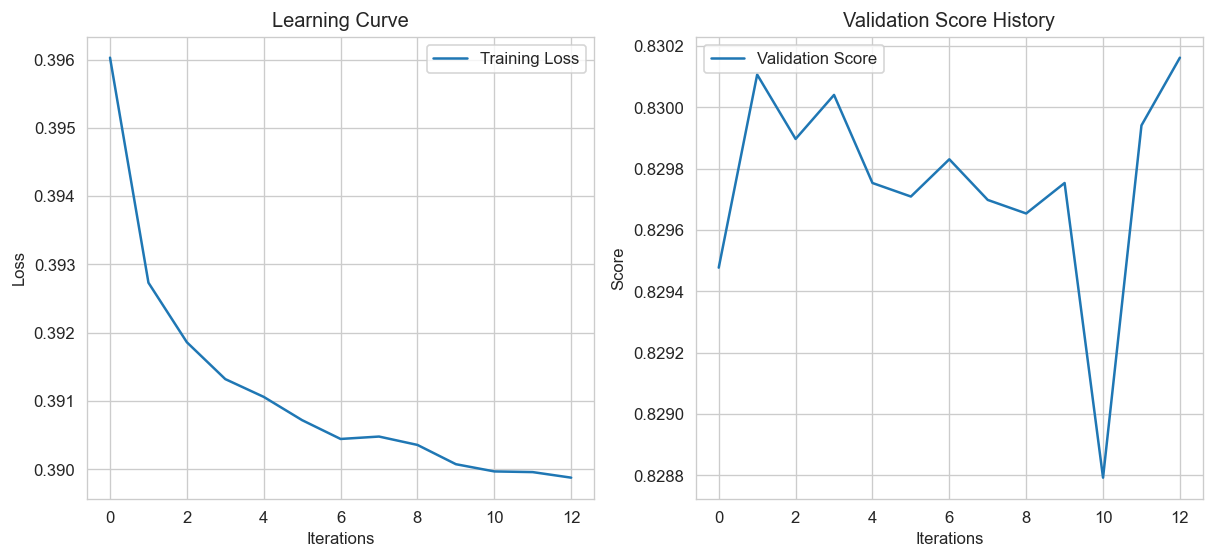

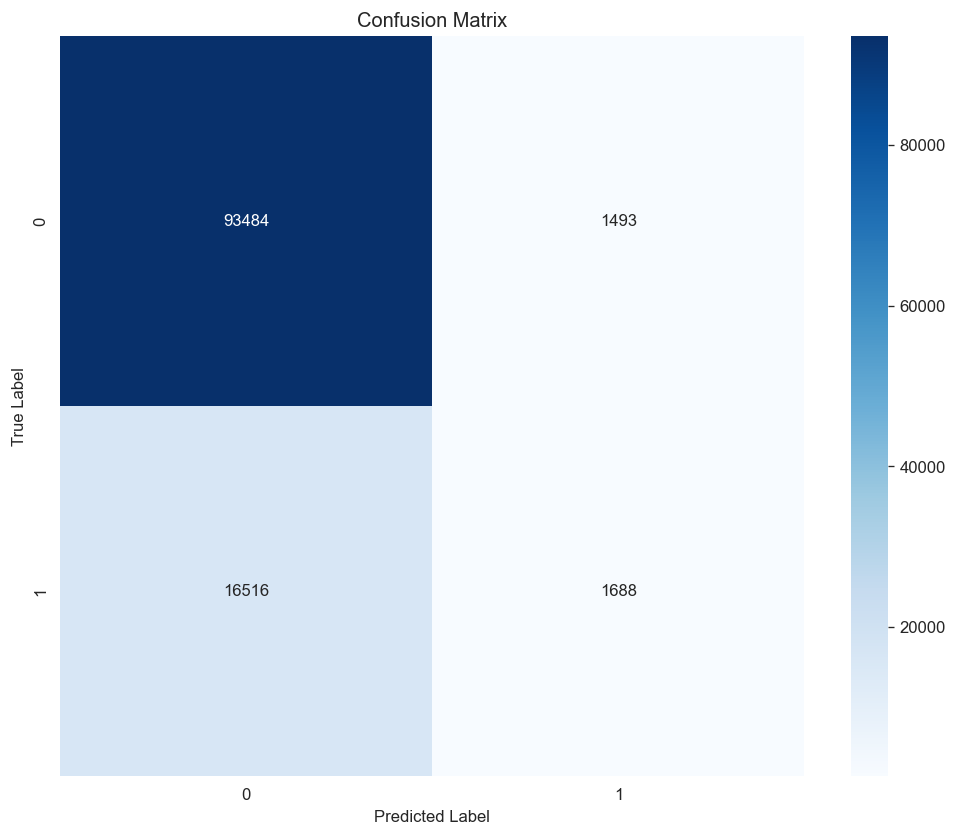

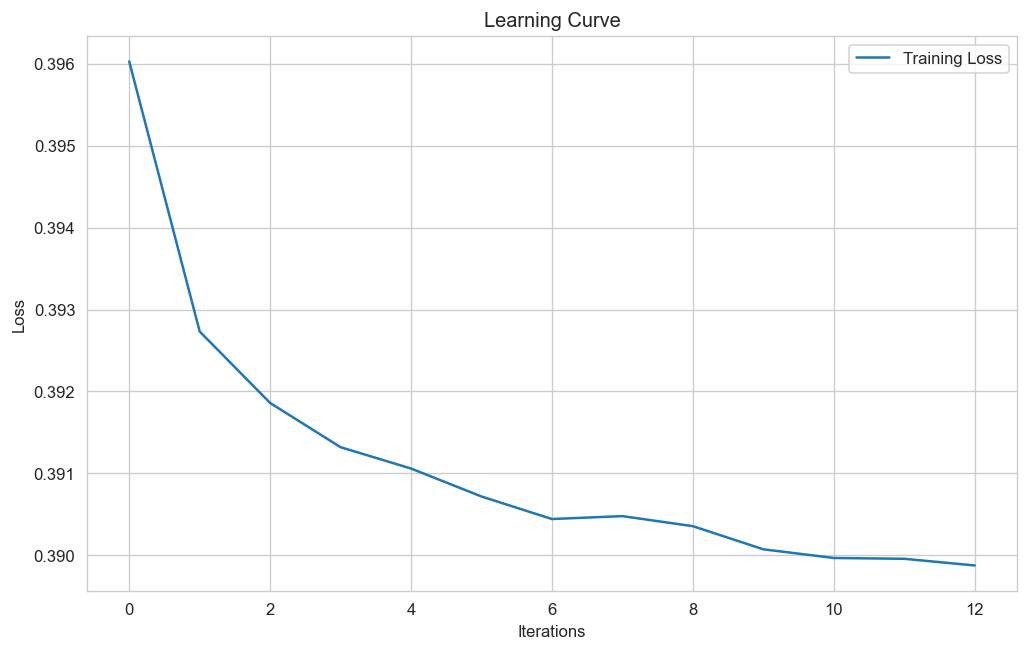

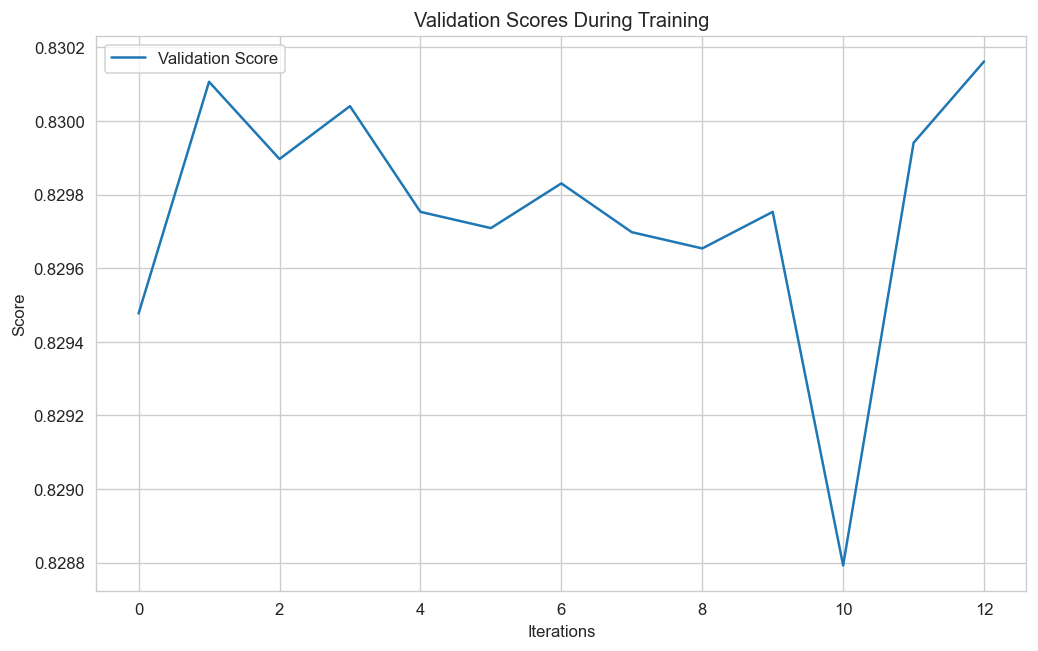

In [1]:
from mlp_classifier import train_and_evaluate
from IPython.display import Image, display

print("\n[STAGE]  MLP Neural Network Classifier")
metrics, report, plot_paths = train_and_evaluate()

print("[RESULT] MLP Performance Metrics:")
for metric, value in metrics.items():
    print(f"         {metric}: {value:.4f}")

print("[RESULT] Classification Report:")
print(f"         Class 0 (No significant increase) - Precision: {report['0']['precision']:.4f}, Recall: {report['0']['recall']:.4f}, F1: {report['0']['f1-score']:.4f}")
print(f"         Class 1 (Significant increase) - Precision: {report['1']['precision']:.4f}, Recall: {report['1']['recall']:.4f}, F1: {report['1']['f1-score']:.4f}")
print(f"         Overall Accuracy: {report['accuracy']:.4f}")

print("\n[PLOTS]  MLP Visualizations:")
for plot_type in plot_paths:
    print(f"         {plot_type}")

# Display all plots inline
display(Image(filename=plot_paths["training_history"]))
display(Image(filename=plot_paths["confusion_matrix"]))
display(Image(filename=plot_paths["loss_curve"]))
display(Image(filename=plot_paths["validation_scores"]))

# Pipeline Complete!

All stages have been executed successfully:

1. **Feature Engineering** - Generated comprehensive technical indicators
2. **PCA + Baseline** - Dimensionality reduction and logistic regression baseline  
3. **Clustering** - K-means clustering for market regime identification
4. **MLP Neural Network** - Deep learning classifier for stock movement prediction

All results, metrics, and visualizations are now available in one consolidated pipeline!